In [1]:
import numpy as np
import pandas as pd
import re
import itertools

import imageio
import imagesc

import glob
import re

import matplotlib.pyplot as plt
import seaborn as sns

import skimage
from skimage import measure
from skimage.transform import resize
import skimage.io
from skimage.io import imsave
from skimage.measure import label, regionprops_table, regionprops

import cv2 as cv
from typing import List
import tifffile as tiff

In [3]:
data_path = '/Users/haokai/Desktop/Github repository/Processed data/'

In [4]:
file_path = '/Users/haokai/Desktop/Github repository/Analysis/Fig. 2 & S2 & S3/'

In [12]:
screen_conditions = pd.read_csv(file_path + 'BMP-BC2_monoclonal_screen_conditions.csv')
screen_conditions

,cell_line,BMP(ng/ml)
0,0_BMPR,64
1,1_control,0
2,1_BMPR,64
3,9_control,0
4,9_BMPR,64
5,12_control,0
6,12_BMPR,64
7,13_control,0
8,13_BMPR,64
9,14_control,0


# The Maximum intensity projected(max) and segemented masks(mask) for each channel used for following intensity measurement
    path_647mask = data_dir + 'ch2_mask/' + re.split('/', f)[-1][0:-4] + '_ch2_Probabilities.tif'
    path_546mask = data_dir + 'ch3_mask/' + re.split('/', f)[-1][0:-4] + '_ch3_Probabilities.tif'
    path_DAPImask = data_dir + 'ch4_mask_GPU/' + re.split('/', f)[-1][0:-4] + '_ch4_cp_masks.png'
    
    path_CFPmax = data_dir + 'SmartMax/' + re.split('/', f)[-1][0:-4] + '_ch1.tif'
    path_647max = data_dir + 'SmartMax/' + re.split('/', f)[-1][0:-4] + '_ch2_rolling_50.tif'
    path_546max = data_dir + 'SmartMax/' + re.split('/', f)[-1][0:-4] + '_ch3_rolling_50.tif'
    path_DAPImax = data_dir + 'SmartMax/' + re.split('/', f)[-1][0:-4] + '_ch4.tif'

In [13]:
sc_df = pd.read_csv(data_path + 'BMP-BC2_monoclonal_screen_recording.csv')
sc_df

,No,cell_line,position,cell_label,lnCFP,int_ratio mean,int_ratio std,int_ratio CV,int_diff mean,int_diff std,int_diff CV,mout avg mean,mout avg std,mout avg CV,barcode_number sum,BMP(ng/ml)
0,1,0,1,1,6.928046,0.570847,0.010261,1.467690,-7.089659,0.349511,-4.025220,0.241452,0.192037,64.939483,3,64
1,1,0,1,2,6.968127,0.569720,0.028174,4.423153,-7.262167,0.711218,-8.759549,0.204881,0.129251,56.425629,5,64
2,1,0,1,3,6.996736,0.547222,NaN,0.000000,-7.818324,NaN,-0.000000,0.103902,NaN,0.000000,1,64
3,1,0,1,4,6.949442,0.594106,0.059725,9.478003,-6.727837,0.891370,-12.491266,0.202611,0.115477,53.734634,9,64
4,1,0,1,5,7.043455,0.574533,0.096242,16.183404,-6.733711,1.243978,-17.847471,0.318929,0.180423,54.653336,15,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9667,12,28,3,102,NaN,0.580208,0.037198,4.533372,-6.945754,0.809801,-8.244109,0.186080,0.049696,18.884656,2,0
9668,12,28,3,103,NaN,0.605915,0.096174,14.196844,-6.011902,1.350224,-20.088105,0.417667,0.092142,19.731966,5,0
9669,12,28,3,104,NaN,0.596195,0.081648,12.248987,-6.476023,1.675600,-23.142319,0.324864,0.205154,56.483767,5,0
9670,12,28,3,106,NaN,0.607966,NaN,0.000000,-6.408387,NaN,-0.000000,0.271775,NaN,0.000000,1,0


In [14]:
cell_counts = sc_df.groupby(['cell_line', 'BMP(ng/ml)'], as_index=False).size()
cell_counts

,cell_line,BMP(ng/ml),size
0,0,64,796
1,1,0,134
2,1,64,403
3,9,0,168
4,9,64,480
5,12,0,368
6,12,64,610
7,13,0,192
8,13,64,717
9,14,0,124


In [15]:
# Set the font properties
plt.rcParams.update({
    'font.family': 'Arial',     # Set the font family
    'font.size': 12,            # Set the base font size
    'axes.titlesize': 16,       # Set the font size of the axes title
    'axes.labelsize': 16,       # Set the font size of the x and y labels
    'xtick.labelsize': 12,      # Set the font size of the x tick labels
    'ytick.labelsize': 12,      # Set the font size of the y tick labels
    'legend.fontsize': 12,      # Set the font size of the legend
    'figure.titlesize': 16      # Set the font size of the figure title
})

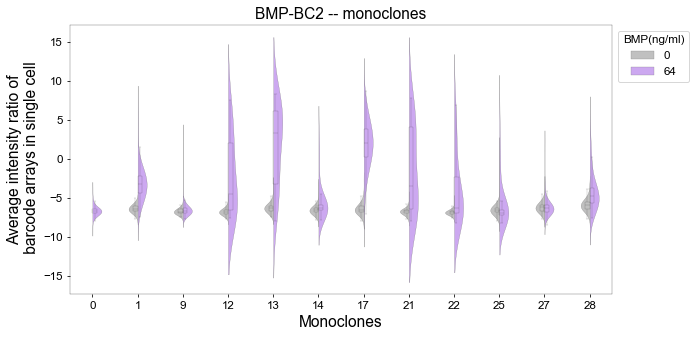

In [17]:
# Monoclones in LiN2, 12, 17, 28
# Define the custom palette
import os

custom_palette = sns.color_palette(['#C0C0C0', '#CC99FF'])

temp_df = sc_df.copy()

# Create the figure
plt.figure(figsize=(10, 5), dpi=70)

# Plot violin plot
sns.violinplot(x='cell_line', 
               y='int_diff mean', 
               data=temp_df, 
               hue='BMP(ng/ml)', 
               palette=custom_palette,
               linewidth=0.25,
               dodge=True,
               split=True,
               density_norm='width',
               saturation=0.7,
               width=0.4,
               bw_method=0.75,
               inner=None # Disable inner to overlay custom boxplot
              )

# Overlay box plot
sns.boxplot(x='cell_line', 
            y='int_diff mean', 
            data=temp_df, 
            hue='BMP(ng/ml)', 
            palette=custom_palette,
            linewidth=0.125,
            legend=False,
            dodge=True,
            width=0.2, # Adjust the width of the box plot
            #fliersize=2, # Size of the outliers
            whis=2, # Whiskers reach 1.5*IQR
            boxprops={'facecolor': 'none', 'edgecolor': 'black', 'linewidth': 0.125},
            whiskerprops={'color': 'black', 'linewidth': 0.125},
            capprops={'color': 'black', 'linewidth': 0.125},
            medianprops={'color': 'black', 'linewidth': 0.125},
            showfliers=False # Option to show or hide outliers
           )

# Customize plot labels and title
plt.xlabel('Monoclones')
plt.ylabel('Average intensity ratio of\n barcode arrays in single cell')
plt.title(f'BMP-BC2 -- monoclones')
plt.legend(title='BMP(ng/ml)', bbox_to_anchor=(1, 1), loc='upper left')

# Customize plot spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.25)

#save_path = os.path.join(data_dir, '230903_dBMPRsg_BC3_CHIR&Dox_monoclone_int_diff_violin.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
# Show the plot
plt.show()


# Fig S2C

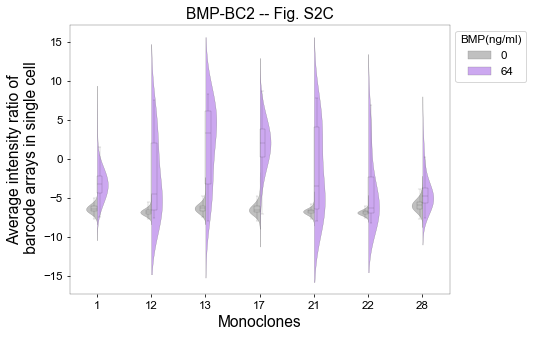

In [20]:
# Monoclones in LiN2, 12, 17, 28
# Define the custom palette
import os

custom_palette = sns.color_palette(['#C0C0C0', '#CC99FF'])

temp_df = sc_df.loc[sc_df['cell_line'].isin([1, 12, 13, 17, 21, 22, 28])].copy()

# Create the figure
plt.figure(figsize=(7, 5), dpi=70)

# Plot violin plot
sns.violinplot(x='cell_line', 
               y='int_diff mean', 
               data=temp_df, 
               hue='BMP(ng/ml)', 
               palette=custom_palette,
               linewidth=0.25,
               dodge=True,
               split=True,
               density_norm='width',
               saturation=0.7,
               width=0.4,
               bw_method=0.75,
               inner=None # Disable inner to overlay custom boxplot
              )

# Overlay box plot
sns.boxplot(x='cell_line', 
            y='int_diff mean', 
            data=temp_df, 
            hue='BMP(ng/ml)', 
            palette=custom_palette,
            linewidth=0.125,
            legend=False,
            dodge=True,
            width=0.2, # Adjust the width of the box plot
            #fliersize=2, # Size of the outliers
            whis=2, # Whiskers reach 1.5*IQR
            boxprops={'facecolor': 'none', 'edgecolor': 'black', 'linewidth': 0.125},
            whiskerprops={'color': 'black', 'linewidth': 0.125},
            capprops={'color': 'black', 'linewidth': 0.125},
            medianprops={'color': 'black', 'linewidth': 0.125},
            showfliers=False # Option to show or hide outliers
           )

# Customize plot labels and title
plt.xlabel('Monoclones')
plt.ylabel('Average intensity ratio of\n barcode arrays in single cell')
plt.title(f'BMP-BC2 -- Fig. S2C')
plt.legend(title='BMP(ng/ml)', bbox_to_anchor=(1, 1), loc='upper left')

# Customize plot spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.25)

#save_path = os.path.join(data_dir, '230903_dBMPRsg_BC3_CHIR&Dox_monoclone_int_diff_violin.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
# Show the plot
plt.show()